In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import RidgeCV, LinearRegression, LassoCV
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
############################## drop ID column #######################
ID = test['Id']
test.drop('Id', axis = 1, inplace = True)
train.drop('Id', axis = 1, inplace = True)

#####################################all_data##########################
all_data = pd.concat((train, test)).reset_index(drop = True)

# Any results you write to the current directory are saved as output.

In [857]:
print(train.shape)
train.head()

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,...,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,...,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,...,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,...,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,...,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [858]:
print(test.shape)
test.head()

(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,...,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,...,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,...,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,...,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,...,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,...,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


> ## Numerical Features

In [2]:
numeric_features = list(test.select_dtypes(exclude=["object",'category']).columns)
numeric_features_num = len(numeric_features)
print("no of numerical feature: ",numeric_features_num,"\nNumerical Features: ",
      numeric_features)

no of numerical feature:  36 
Numerical Features:  ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [860]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [861]:
pd.options.display.max_columns = 45
test.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1457.000000,1457.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.00000,1381.000000,1458.000000,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,554.294925,1046.117970,1156.534613,325.967786,3.543523,1486.045922,0.434454,0.065202,1.570939,0.377656,2.854010,1.042495,6.385195,0.58122,1977.721217,1.766118,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,437.260486,442.898624,398.165820,420.610226,44.043251,485.566099,0.530648,0.252468,0.555190,0.503017,0.829788,0.208472,1.508895,0.64742,26.431175,0.775945,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,0.000000,407.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.00000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,219.250000,784.000000,873.500000,0.000000,0.000000,1117.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.00000,1959.000000,1.000000,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,460.000000,988.000000,1079.000000,0.000000,0.000000,1432.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,0.00000,1979.000000,2.000000,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,797.750000,1305.000000,1382.500000,676.000000,0.000000,1721.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.00000,2002.000000,2.000000,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,2140.000000,5095.000000,5095.000000,1862.000000,1064.000000,5095.000000,3.000000,2.000000,4.000000,2.000000,6.000000,2.000000,15.000000,4.00000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


## Categorical Features

In [3]:
category_feature = list(test.select_dtypes(exclude=[np.number]).columns)
category_feature_num = len(category_feature)
print("no. of categorical feature: ",category_feature_num,"\nCategorical Features: ", category_feature)

no. of categorical feature:  43 
Categorical Features:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [863]:
train.describe(include = ['O'])              #Shows Categorical Features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [864]:
test.describe(include = ['O'])               #Shows Categorical Features

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


##  Saleprice

In [865]:
train["SalePrice"].describe()
SP = train["SalePrice"]
print(train['SalePrice'].iloc[297])

239000


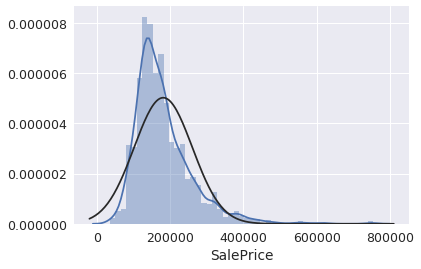

In [866]:
import scipy.stats as st
sns.distplot(train["SalePrice"], kde=True, fit=st.norm)

looking on the graph we can conclude that SalePrice is not normally distributed.

In [867]:
print(train["SalePrice"].skew())
print(train["SalePrice"].kurt())

1.88287575977
6.53628186006


Positive skewness indicates that SalePrice is skewed to right.

In [868]:
train["SalePrice"] = np.log1p(train["SalePrice"])

In [869]:
print(train["SalePrice"].skew())
print(train["SalePrice"].kurt())

0.121346619897
0.809519155708


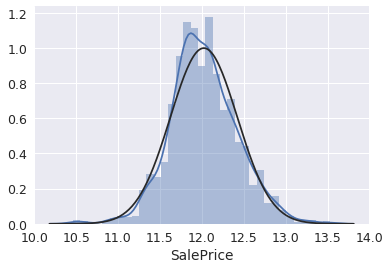

In [870]:
import scipy.stats as st
sns.distplot(train["SalePrice"], kde=True, fit=st.norm)


### What effect does it have on our prediction if SalePrice is not normally distributed and is skewed?
We will come to this point later. But now we should see what are the assumptions in Regression(Considering Ridge and lasso).
1. Dependent variable(SalePrice) should be approximately normally distributed. And henceforth should not be skewed.
2. residual error should be normally distributed. Plotting a graph of residual error vs our prediction gives us a idea about if residual is normally distributed and remedy steps we should take if it is not.



## Some numerical features are categorical. So we would type convert them to categorical.
Let's plot there scatter plot to see who are those numeric features.

In [ ]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train, id_vars=["SalePrice"], value_vars=numeric_features[:-1])
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

In [872]:
from IPython.display import display, HTML
pd.options.display.max_rows = 10
pd.options.display.max_columns = 90
# train['Fireplaces'].value_counts()

In [873]:
#Converting MoSold,MSSubClass to categorical feature
num_to_cat = ['MSSubClass', "MoSold"]
for col in num_to_cat:
    train[col] = train[col].astype('category')
    test[col] = test[col].astype('category')
    numeric_features.remove(col)
    category_feature.append(col)

## Correlation between variables
  We will see the corealation between numeric features and SalePrice

(35, 35)

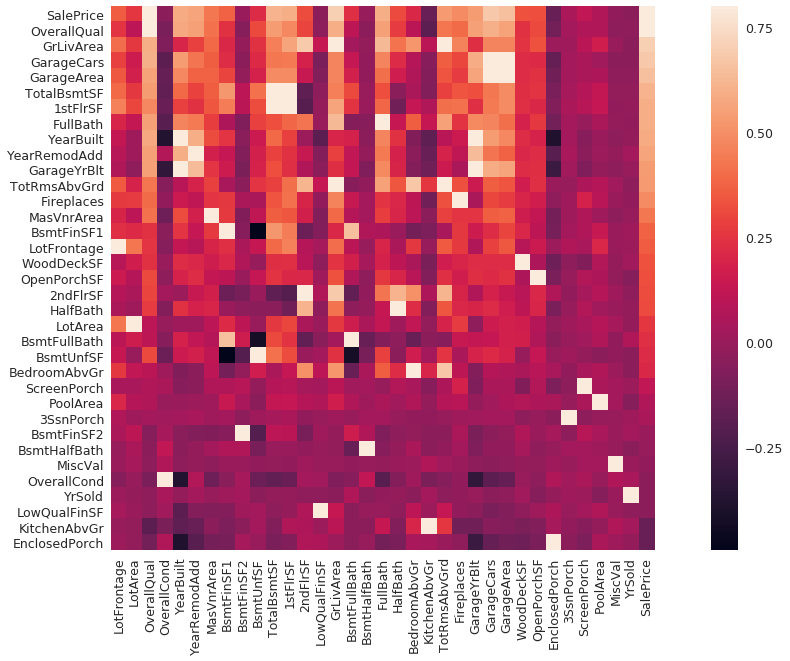

In [874]:
pd.options.display.max_rows = 45
pd.options.display.max_columns = 45
corrmat = train.corr()
corrmat.sort_values("SalePrice",inplace = True, ascending= False)
# print(sorted(list(corrmat["SalePrice"].values)))
plt.figure(figsize=(20,10))
sns.heatmap(corrmat, vmax=.8, square=True );
display(corrmat.shape)

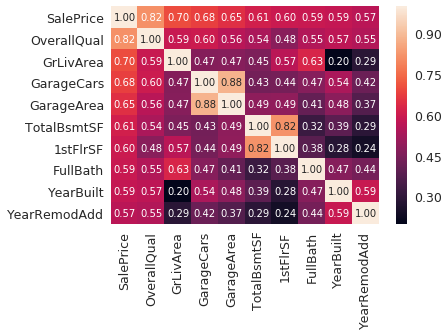

In [875]:
# We will take top 10 most correlated components
# https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python

k= 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



   1. TotRmsAbvGrd and GrLivArea are significantly correlated so we will only have GrLivArea(Pending FullBath)
   2. GarageCars and GarageArea are highly corelated with each other. So we will only reatain GarageArea. Also GarageYrBlt is highy correlated to GarageArea but I won't drop it as what is the GarageArea have to take with GarageYrBlt also drop is.
   3. TotalBsmtSF and 1stFlrSF are highly correlated so we will drop 1stFlrSF
   4. Pending correlation between YearRemoteAdd and YearBuilt
So now our top components having high corelation with SalePrice are: , GrLivArea, GarageCars, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd


In [876]:
len(train.columns)

80

In [877]:
# droping TotRmsAbvGrd, 1stFlrSF,  and GarageCars
drop = ['3SsnPorch', 'MiscVal','PoolArea', "GarageCars",
        'ScreenPorch']
train.drop(drop, axis = 1, inplace = True)
test.drop(drop, axis = 1, inplace = True)
len(train.columns)
numeric_features = [i for i in numeric_features if i not in drop]
category_feature = [i for i in category_feature if i not in drop]

## Dropping Categorical Data with very low variance
Idea is adopted from the
notebook of PhilipBall, Link to the notebook is given here
[Notebook](https://www.kaggle.com/fiorenza2/journey-to-the-top-10)

In [878]:
cat_lowVar = [col for col in category_feature if sum(train[col] == train[col].mode()[0])/len(train) > 0.94]
cat_lowVar

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']

In [879]:
train.drop(cat_lowVar, axis = 1, inplace = True)
test.drop(cat_lowVar, axis = 1, inplace = True)
category_feature = [i for i in category_feature if i not in cat_lowVar]

## Removing Outliars(numerical features)
   **Numerical feature having outliars are**:
             1. GrLivArea -> 4
             2. TotalBsmtSF -> 1
             3. LotFrontage ->2
             4. MasVnrArea ->1
             5. BsmtFinSF1 ->1

In [880]:
#Removing OutLiars:
#GrLivArea
temp = ((train["GrLivArea"]>4000) & (train["SalePrice"]<13))
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#TotalBsmtSF
temp = train["TotalBsmtSF"]>4000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#LotFrontage
temp = train["LotFrontage"]>300
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#MasVnrArea
temp = train["MasVnrArea"]>1500
train.drop((temp[temp == True].index), axis = 0, inplace = True)
#BsmtFinSF
temp = train["BsmtFinSF1"]>5000
train.drop((temp[temp == True].index), axis = 0, inplace = True)

In [881]:
# train.drop(train.index[train['SalePrice']>500000], axis = 0, inplace = True)

In [882]:
print(297 in train.index)

False


## Box-Plot some numerical features which have discrete values

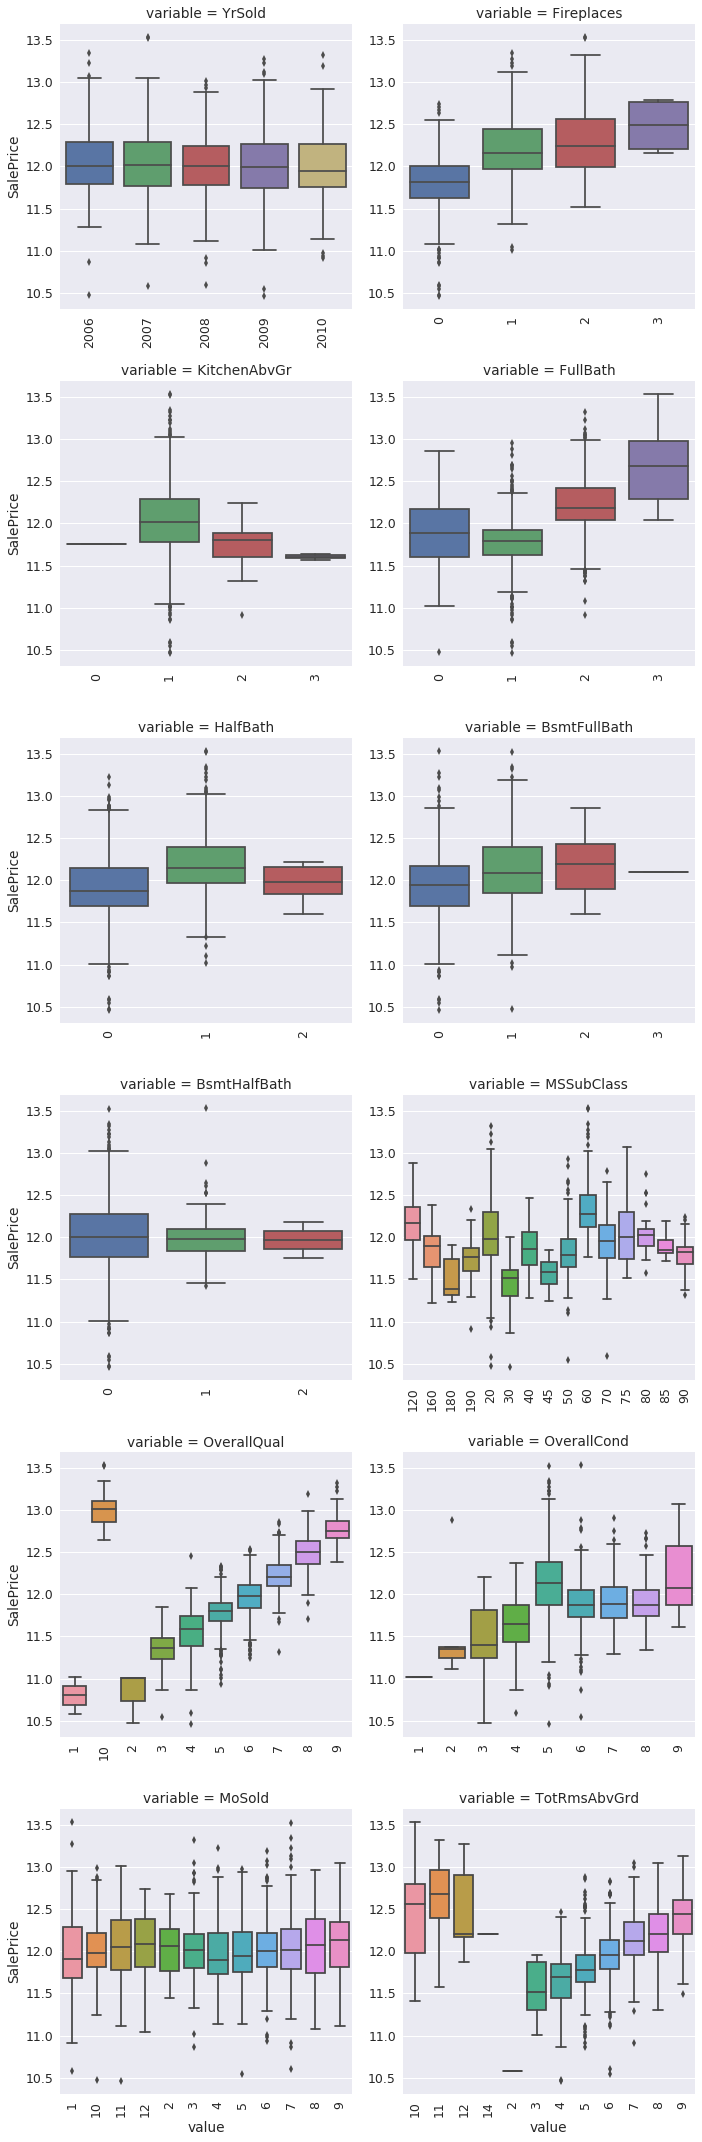

In [883]:
box_feature= ["YrSold", "Fireplaces", "KitchenAbvGr", "FullBath", "HalfBath", "BsmtFullBath",
             "BsmtHalfBath", "MSSubClass","OverallQual", "OverallCond", "MoSold",'TotRmsAbvGrd']
train_temp = train.copy()
for col in box_feature:
    train_temp[col] = train_temp[col].astype(str)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_temp, id_vars=['SalePrice'], value_vars=box_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

del train_temp

In [884]:
#print numeric and categorical feature again
numeric_features = train.select_dtypes(exclude = ['O','category']).columns
numeric_features_num = len(numeric_features)
category_feature_num = len(category_feature)
print("No of numeric Features: ",numeric_features_num,"\n", numeric_features)
print("No of Categorical Features: ",category_feature_num,"\n", category_feature)

No of numeric Features:  30 
 Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'YrSold',
       'SalePrice'],
      dtype='object')
No of Categorical Features:  39 
 ['MSZoning', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDriv

## Box Plot of categorical data

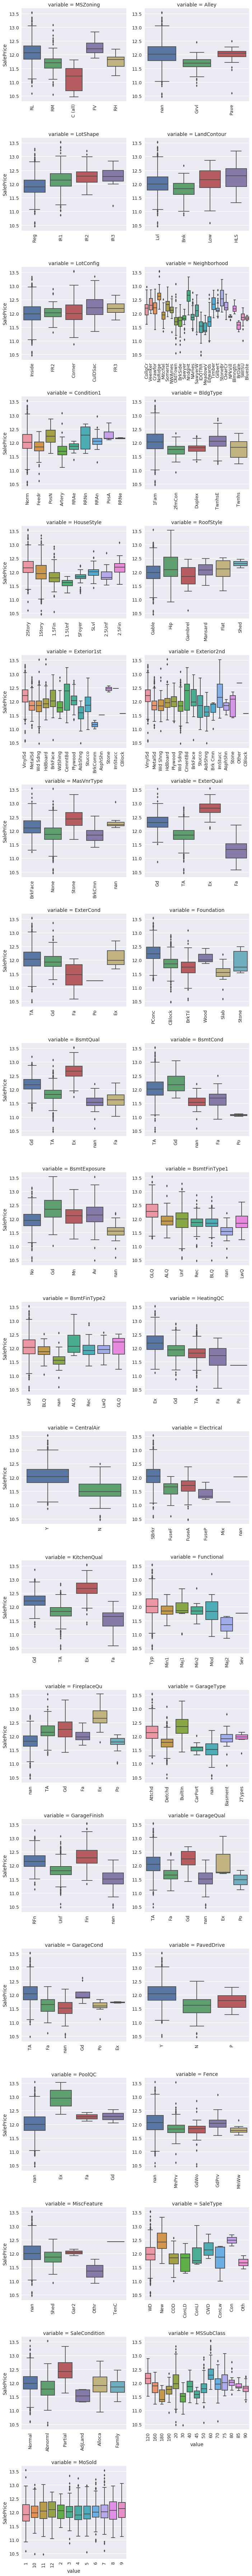

In [885]:
train_temp = train.copy()
for col in category_feature:
    train_temp[col] = train_temp[col].astype(str)
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train_temp, id_vars=['SalePrice'], value_vars=category_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

del train_temp

### REMOVE OUTLIERS IN CATEGORICAL DATA

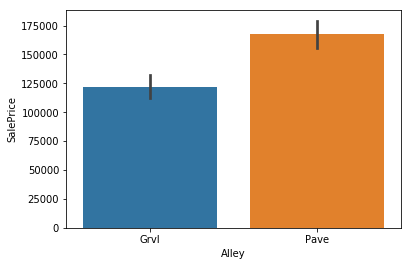

In [23]:
# (train[['SalePrice']].groupby(train['MSZoning'])).boxplot()
sns.hist(x = train['Alley'],y = train['SalePrice'])
# sns.

In [886]:
#MSZONING

#Alley
display(train.shape)
temp = train["Alley"].notnull()
temp = temp[temp == True].index
temp = train.loc[temp]["SalePrice"]>250000
train.drop((temp[temp == True].index), axis = 0, inplace = True)
display(train.shape)


(1456, 69)

(1456, 69)


## Missing Data
### 1. Numerical

In [887]:
print("Training Data: ",train.shape)
missing_num = train[numeric_features].isnull().sum()
missing_num = missing_num[missing_num>0]
missing_num.sort_values(inplace = True, ascending = False)
missing_num = pd.DataFrame({"missing":missing_num})
display(missing_num)
missing_num1 = test[numeric_features[:-1]].isnull().sum()
missing_num1 = missing_num1[missing_num1>0]
missing_num1.sort_values(inplace=True,ascending=False)
missing_num1 = pd.DataFrame({"missing": missing_num1})
print("Test Data: ",test.shape)
display(missing_num1)

Training Data:  (1456, 69)


,missing
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


Test Data:  (1459, 68)


,missing
LotFrontage,227
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
GarageArea,1
TotalBsmtSF,1
BsmtUnfSF,1
BsmtFinSF2,1
BsmtFinSF1,1


### Train Data: Replace Nan in Lot Frontage and MasVnrArea with their mean value GarageYrBlt with mode.
### Test Data: Replace missing data with their mean, except in 'BsmtHalfBath' and 'BsmtFullBath', these have discrete value hence replace with mode().
            

In [888]:
pd.options.display.max_rows = 1400
pd.options.display.max_columns = 70
train.fillna({'LotFrontage':train['LotFrontage'].mean(),
              'MasVnrArea':train['MasVnrArea'].mean(), 'GarageYrBlt':
             train['GarageYrBlt'].mode().values[0]}, inplace = True )
test.fillna({'BsmtHalfBath':test['BsmtHalfBath'].mode()[0], 
             'BsmtFullBath':test['BsmtFullBath'].mode()[0],'GarageYrBlt':
             test['GarageYrBlt'].mode()[0]},inplace = True)
test.fillna(test[missing_num1.index].mean(), inplace = True)

print(test[numeric_features[:-1]].isnull().any().any())
print(train[numeric_features[:-1]].isnull().any().any())


False
False


### 2. Categorical


In [889]:
missing_cat = train[category_feature].isnull().sum()
print(missing_cat)
missing_cat = missing_cat[missing_cat>0]
missing_cat.sort_values(inplace=True,ascending=False)
missing_cat = pd.DataFrame({"missing": missing_cat})
print("Training Data: ")
display(missing_cat)
# train[missing_cat.index] = train[missing_cat.index].astype('category')
for col in category_feature:
    train[col] = train[col].astype('category')
# print(train[missing.index])
missing_cat1 = test[category_feature[:-1]].isnull().sum()
missing_cat1 = missing_cat1[missing_cat1>0]
missing_cat1.sort_values(inplace=True,ascending=False)
missing_cat1 = pd.DataFrame({"missing": missing_cat1})
print("\nTest Data: ")
display(missing_cat1)

for col in category_feature:
    test[col] = test[col].astype('category')
# missing_electrical = train[train["Electrical"].isnull()].index.tolist()
# print(missing_electrical)

MSZoning            0
Alley            1366
LotShape            0
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
BldgType            0
HouseStyle          0
RoofStyle           0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1450
Fence            1175
MiscFeature      1402
SaleType            0
SaleCondition       0
MSSubClass          0
MoSold              0
dtype: int64
Training Data: 


,missing
PoolQC,1450
MiscFeature,1402
Alley,1366
Fence,1175
FireplaceQu,690
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtFinType2,38



Test Data: 


,missing
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
FireplaceQu,730
GarageCond,78
GarageQual,78
GarageFinish,78
GarageType,76
BsmtCond,45


1. GarageCond, GarageQual, Garagefinish, GarageType should be filled as none because whenever value is none corresponding GarageArea is 0 means no garage is available
2. BsmtCond, BsmtQual, BsmtExposure, BsmtFinType2, BsmtFinType1
- BsmtExposure NaN value should be filled with "N0"
3. NaN value of fence means no fence
4. FireplaceQU, NaN value should be filled with none because corresponding number of places 
5. MasVnrType should be filled none because corresponding MasvnrArea is 0
6. I don't have any idea about electrical. So I will remove the row containing missing data

In [890]:
train['BsmtExposure'].fillna('No', inplace = True)
test['BsmtExposure'].fillna('No', inplace = True)
print(train['BsmtExposure'].isnull().any().any())
for col in missing_cat.index:
    train.replace({col:{"None":np.nan}}, inplace = True)
    train[col] = train[col].astype('category')
    train[col].cat.add_categories("None", inplace = True)
    train[col].fillna("None", inplace = True)
train.drop(train.index[1379], inplace = True)

train['BsmtExposure'].cat.remove_unused_categories(inplace = True)  #"none" is unused category
print(train['BsmtExposure'].isnull().any().any())
#Filling missing data in test
temp = list(missing_cat1.index)
temp = temp[:-1]
for col in temp:
    test.replace({col:{"None":np.nan}}, inplace = True)
    test[col] = test[col].astype('category')
    test[col].cat.add_categories("none", inplace = True)
    test[col].fillna("none", inplace = True)
test['BsmtExposure'].cat.remove_unused_categories(inplace = True)
df =test[missing_cat1.index].mode()
df1 = pd.Series(list(df.values[0,:]), index = df.columns)
test.fillna(df1, inplace = True)


print(test.isnull().any().any())
print(train.isnull().any().any())

False
False
False
False


In [891]:
print(train.shape)
print(test.shape)

(1455, 69)
(1459, 68)


## Transforming skewed features

In [892]:
train1 = train.copy()
test1 = test.copy()
all_data = pd.concat([train1, test1])
all_data.drop(['SalePrice'], axis = 1, inplace = True)
numeric_features = numeric_features[:-1]
skewed = all_data[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed.index
print(all_data.isnull().any().any())
all_data[skewed] = np.log1p(all_data[skewed])
print(all_data.isnull().any().any())

False
False


In [893]:
train1 = all_data.iloc[:1455]
print(train1.shape)
test1 = all_data.iloc[1455:]
print(test1.shape)
train1["SalePrice"] = train["SalePrice"]
print(train1.isnull().any().any())
print(test1.isnull().any().any())

(1455, 68)
(1459, 68)
False
False


### Plotting Numerical Features

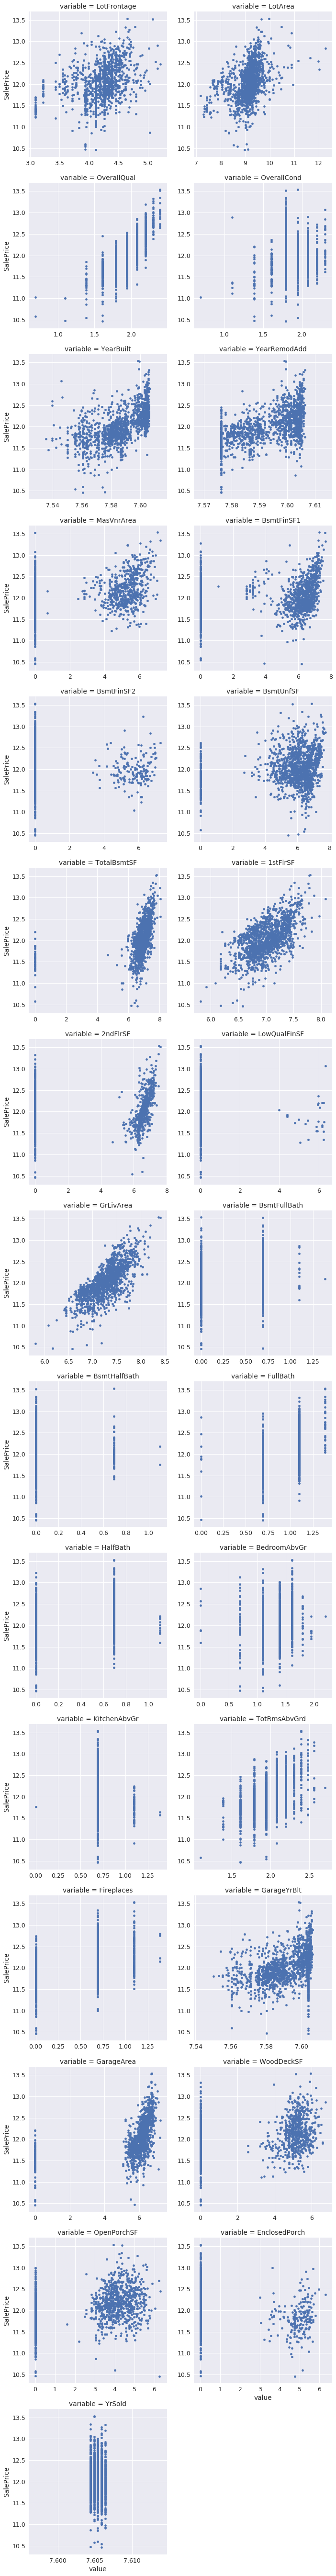

In [894]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train1, id_vars=["SalePrice"], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")

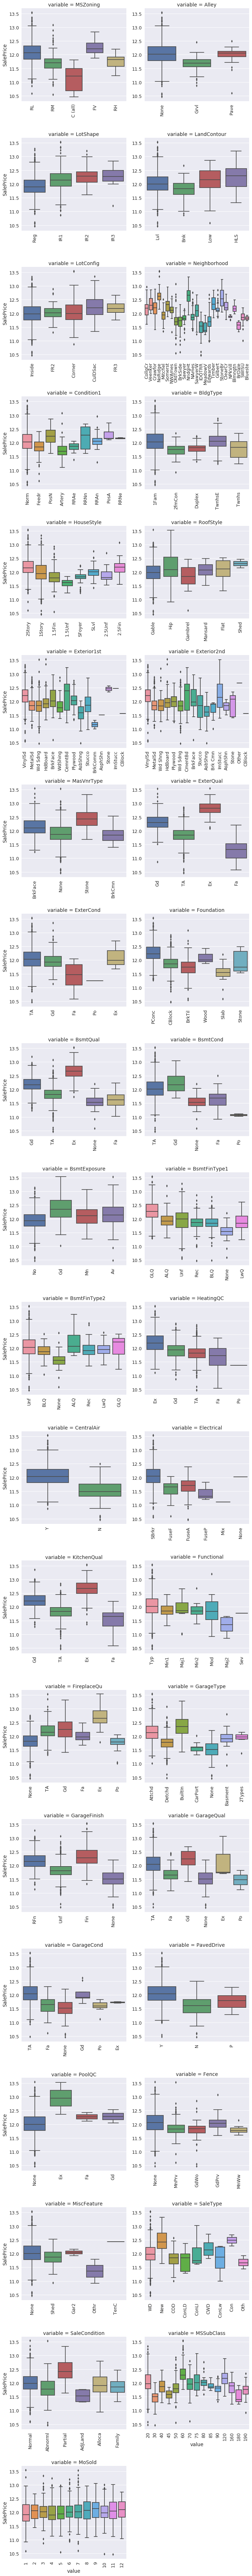

In [895]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
f = pd.melt(train1, id_vars=['SalePrice'], value_vars=category_feature)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "SalePrice")

## Encoding Variable
### 1.Training Data
** Fisr Let's print various categories and divide them in nominal and ordinal variable**

In [896]:
print(train1.shape, test1.shape)

(1455, 69) (1459, 68)


In [897]:
for col in category_feature:
    train1[col] = train1[col].astype('category')
    print(col)
    print(train1[col].unique())

MSZoning
[RL, RM, C (all), FV, RH]
Categories (5, object): [RL, RM, C (all), FV, RH]
Alley
[None, Grvl, Pave]
Categories (3, object): [None, Grvl, Pave]
LotShape
[Reg, IR1, IR2, IR3]
Categories (4, object): [Reg, IR1, IR2, IR3]
LandContour
[Lvl, Bnk, Low, HLS]
Categories (4, object): [Lvl, Bnk, Low, HLS]
LotConfig
[Inside, FR2, Corner, CulDSac, FR3]
Categories (5, object): [Inside, FR2, Corner, CulDSac, FR3]
Neighborhood
[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ..., NPkVill, Blmngtn, BrDale, SWISU, Blueste]
Length: 25
Categories (25, object): [CollgCr, Veenker, Crawfor, NoRidge, ..., Blmngtn, BrDale, SWISU, Blueste]
Condition1
[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, PosA, RRNe]
Categories (9, object): [Norm, Feedr, PosN, Artery, ..., RRNn, RRAn, PosA, RRNe]
BldgType
[1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
Categories (5, object): [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]
HouseStyle
[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl, 2.5Unf, 2.5Fin]
Categories (8, object): [2Story, 1Stor

**Ordinal Variables**: PoolQC, FireplaceQu, GarageCond, GarageQual, BsmtExposure, BsmtCond, BsmtQual, ExterQual,
                                      ExterCond, HeatingQC, KitchenQual, *MSSubClass, MoSold*

In [898]:
ord_cat = ["PoolQC", "FireplaceQu", 'BsmtCond', 'GarageCond', 
           'BsmtQual', 'ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']
dic_num = {'None': 1, 'none':1, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}
#, 'GarageCond', 'GarageQual'

In [899]:
# BsmtExposure has categories: Av, Gd, Mn, No 
train1['BsmtExposure'].replace({'No':1,'Av':2,'Gd':3,'Mn':2},inplace = True)
train1['BsmtExposure'] = train1['BsmtExposure'].astype('float64')
cat1 = list(train1['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
print(cat1)
train1.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat:
    train1[col].replace(dic_num, inplace = True)
    train1[col] = train1[col].astype('float64')

# all_data.replace({
    
# })

[20, 30, 40, 45, 50, 60, 70, 75, 80, 85, 90, 120, 160, 180, 190]


In [900]:
pd.options.display.max_columns = 70
print((train1.select_dtypes(exclude = ['O','category']).columns))

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtCond', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual',
       'BsmtUnfSF', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'FireplaceQu',
       'Fireplaces', 'FullBath', 'GarageArea', 'GarageCond', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LotArea', 'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolQC', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold',
       'SalePrice'],
      dtype='object')


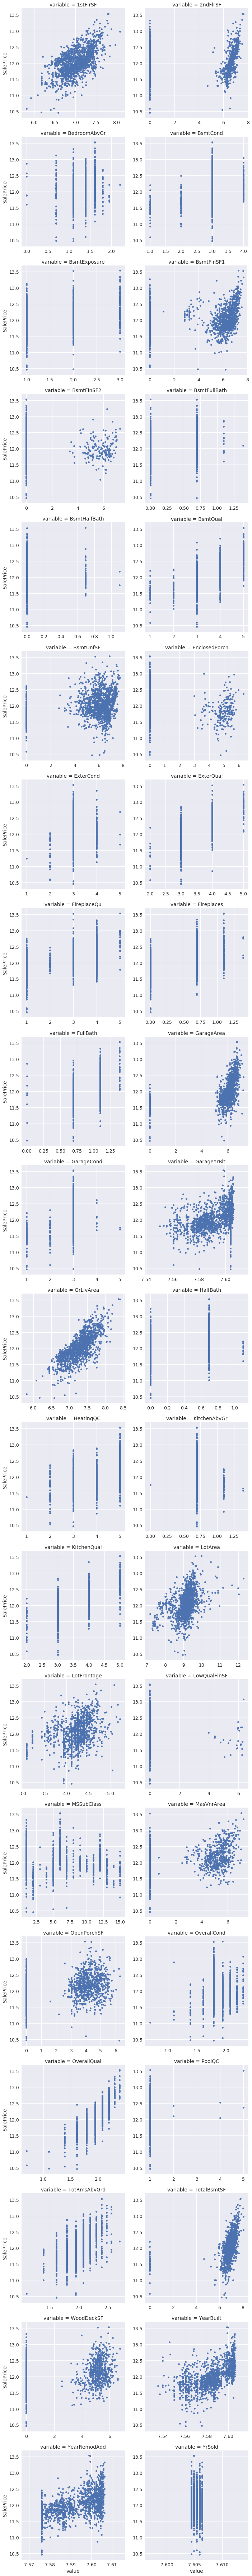

In [901]:
numeric_features = list(train1.select_dtypes(exclude = ['O','category']).columns)
numeric_features = numeric_features[:-1]
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts.plot.scatter('time', 'val',ax=ax)
f = pd.melt(train1, id_vars=["SalePrice"], value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False,size=5 )
g = g.map(pairplot, "value", "SalePrice")
ord_cat = ["PoolQC", "FireplaceQu", 'BsmtCond', 'GarageCond', 
           'BsmtQual', 'ExterQual','ExterCond', 'HeatingQC', 'KitchenQual']

## 2. Test Data(Encoding Categorical Variable)

In [902]:
for col in category_feature:
    test1[col]= test1[col].astype('category')
    print(col)
    print(test[col].cat.categories)

MSZoning
Index(['C (all)', 'FV', 'RH', 'RL', 'RM', 'none'], dtype='object')
Alley
Index(['Grvl', 'Pave', 'none'], dtype='object')
LotShape
Index(['IR1', 'IR2', 'IR3', 'Reg'], dtype='object')
LandContour
Index(['Bnk', 'HLS', 'Low', 'Lvl'], dtype='object')
LotConfig
Index(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype='object')
Neighborhood
Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')
Condition1
Index(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'],
      dtype='object')
BldgType
Index(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype='object')
HouseStyle
Index(['1.5Fin', '1.5Unf', '1Story', '2.5Unf', '2Story', 'SFoyer', 'SLvl'], dtype='object')
RoofStyle
Index(['Flat', 'Gabl

**Ordinal Variable**: ExterQual, ExterCond, BsmtQual, BsmtExposure, BsmtCond,  HeatingQC, FireplaceQu, GarageQual, GarageCond, PoolQC, MSSubClass, MoSold

In [903]:
ord_cat1 = ['ExterQual', 'ExterCond', 'BsmtQual', 'GarageCond', 'BsmtCond', 'HeatingQC', 
           'FireplaceQu', 'PoolQC','KitchenQual']
#'GarageQual', 'GarageCond'

In [904]:
# BsmtExposure has categories: Av, Gd, Mn, No 
print(test['BsmtExposure'].head())
test1['BsmtExposure'].replace({'No':1,'Av':2,'Gd':3,'Mn':2}, inplace = True)
test1['BsmtExposure'] = test1['BsmtExposure'].astype('float64')
cat1 = list(test1['MSSubClass'].cat.categories)
d1 = dict(zip(cat1, np.arange(1,len(cat1)+1)))
test1.replace({'MSSubClass': d1}, inplace = True)
for col in ord_cat1:
    print(col)
    test1[col].replace(dic_num, inplace = True)
    test1[col] = test1[col].astype('float64')
print(test['BsmtExposure'].head())

0    No
1    No
2    No
3    No
4    No
Name: BsmtExposure, dtype: category
Categories (4, object): [Av, Gd, Mn, No]
ExterQual
ExterCond
BsmtQual
GarageCond
BsmtCond
HeatingQC
FireplaceQu
PoolQC
KitchenQual
0    No
1    No
2    No
3    No
4    No
Name: BsmtExposure, dtype: category
Categories (4, object): [Av, Gd, Mn, No]


<hr>

### Get Dummy Variables

In [905]:
SP = train1['SalePrice']

In [906]:
train2 =pd.get_dummies(train1, drop_first = False)
display(train2.head(n=1))

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCond,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,PoolQC,TotRmsAbvGrd,...,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,6.753438,6.751101,1.386294,3.0,1.0,6.561031,0.0,0.693147,0.0,4.0,5.01728,0.0,3.0,4.0,1.0,0.0,1.098612,6.308098,3.0,7.6029,7.444833,0.693147,5.0,0.693147,4.0,9.04204,4.189655,0.0,6,5.283204,4.127134,1.791759,2.079442,1.0,2.197225,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [907]:
test2 = pd.get_dummies(test1, drop_first = False)
display(test2.head(n = 1))

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtQual,BsmtUnfSF,EnclosedPorch,ExterCond,ExterQual,FireplaceQu,Fireplaces,FullBath,GarageArea,GarageCond,GarageYrBlt,GrLivArea,HalfBath,HeatingQC,KitchenAbvGr,KitchenQual,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,PoolQC,TotRmsAbvGrd,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_N,PavedDrive_P,PavedDrive_Y,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_none
0,6.799056,0.0,1.098612,3.0,1.0,6.150603,4.976734,0.0,0.0,3.0,5.602119,0.0,3.0,3.0,1.0,0.0,0.693147,6.594413,3.0,7.58172,6.799056,0.0,3.0,0.693147,3.0,9.360741,4.394449,0.0,1,0.0,0.0,1.94591,1.791759,1.0,1.791759,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [908]:
del_features1 = [i for i in train2.columns if i not in test2.columns]
del_features2 = [i for i in test2.columns if i not in train2.columns]
del_features = del_features1 + del_features2
print(del_features)

['SalePrice', 'Alley_None', 'BsmtFinType1_None', 'BsmtFinType2_None', 'Electrical_Mix', 'Electrical_None', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'Exterior2nd_Other', 'Fence_None', 'GarageFinish_None', 'GarageQual_Ex', 'GarageQual_None', 'GarageType_None', 'HouseStyle_2.5Fin', 'MasVnrType_None', 'MiscFeature_None', 'MiscFeature_TenC', 'Alley_none', 'BsmtFinType1_none', 'BsmtFinType2_none', 'Exterior1st_none', 'Exterior2nd_none', 'Fence_none', 'Functional_none', 'GarageFinish_none', 'GarageQual_none', 'GarageType_none', 'MSZoning_none', 'MasVnrType_none', 'MiscFeature_none', 'SaleType_none']


In [909]:
for i in del_features1:
    train2.drop(i, axis = 1, inplace = True)
for i in del_features2:
    test2.drop(i, axis = 1, inplace = True)

<hr>

#### Remove Unecessry Variables

In [910]:
del_col = []
for col in train2.columns:
    print(col)
    temp1 = train2[col].value_counts().max()/train.shape[0]
    temp2 = test2[col].value_counts().max()/test.shape[0]
    print(temp1, temp2)
    if(temp1>0.94 and temp2>0.97):
        del_col.append(col)
print(del_col)

1stFlrSF
0.0171821305842 0.0143934201508
2ndFlrSF
0.568384879725 0.575051405072
BedroomAbvGr
0.549828178694 0.542837559973
BsmtCond
0.897594501718 0.887594242632
BsmtExposure
0.679725085911 0.681973954764
BsmtFinSF1
0.320274914089 0.316655243317
BsmtFinSF2
0.885223367698 0.875942426319
BsmtFullBath
0.586941580756 0.583276216587
BsmtHalfBath
0.943642611684 0.936257710761
BsmtQual
0.445360824742 0.434544208362
BsmtUnfSF
0.0810996563574 0.084304318026
EnclosedPorch
0.857731958763 0.82796435915
ExterCond
0.878350515464 0.860863605209
ExterQual
0.621305841924 0.611377655929
FireplaceQu
0.487285223368 0.518163125428
Fireplaces
0.4735395189 0.50034270048
FullBath
0.525085910653 0.522275531186
GarageArea
0.0556701030928 0.0520904729267
GarageCond
0.907903780069 0.910212474297
GarageYrBlt
0.100343642612 0.106237148732
GrLivArea
0.0151202749141 0.0130226182317
HalfBath
0.626116838488 0.631254283756
HeatingQC
0.505841924399 0.51542152159
KitchenAbvGr
0.953264604811 0.954763536669
KitchenQual
0.50

0.93058419244 0.938999314599
SaleCondition_AdjLand
0.997250859107 0.994516792324
SaleCondition_Alloca
0.99175257732 0.991775188485
SaleCondition_Family
0.986254295533 0.982179575051
SaleCondition_Normal
0.821305841924 0.825222755312
SaleCondition_Partial
0.915463917526 0.917751884853
SaleType_COD
0.970446735395 0.969842357779
SaleType_CWD
0.997250859107 0.994516792324
SaleType_Con
0.998625429553 0.997943797121
SaleType_ConLD
0.99381443299 0.988348183687
SaleType_ConLI
0.996563573883 0.997258396162
SaleType_ConLw
0.996563573883 0.997943797121
SaleType_New
0.917525773196 0.919808087731
SaleType_Oth
0.99793814433 0.997258396162
SaleType_WD
0.868728522337 0.862234407128
['LowQualFinSF', 'PoolQC', 'Alley_Pave', 'BldgType_2fmCon', 'BsmtFinType2_ALQ', 'BsmtFinType2_BLQ', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Electrical_FuseF', 'Electrical_FuseP', 'Exterior1st_AsbShng', 'Exterio

In [911]:
train2.drop(del_col, axis = 1, inplace = True)
test2.drop(del_col, axis = 1, inplace = True)

<hr>

#### Add Polynomial Feature

In [912]:
pd.DataFrame(train2.columns)

,0
0,1stFlrSF
1,2ndFlrSF
2,BedroomAbvGr
3,BsmtCond
4,BsmtExposure
5,BsmtFinSF1
6,BsmtFinSF2
7,BsmtFullBath
8,BsmtHalfBath
9,BsmtQual


In [913]:
# train2['OverallQual_cond'] = train2['OverallQual']*train['OverallCond']
# test2['OverallQual_cond'] = test2['OverallQual']*test2['OverallCond']
###################################################
train2['totalBath'] = train2['FullBath'] + train2['HalfBath']
test2['totalBath'] = test2['FullBath'] + test2['HalfBath']
train2.drop(['FullBath','HalfBath'], axis = 1, inplace = True)
test2.drop(['FullBath', 'HalfBath'], axis = 1, inplace = True)
############################################################
# train2['TotalSurface'] = train2['2ndFlrSF']+train2['1stFlrSF'] * train2['TotalBsmtSF']
# test2['TotalSurface'] = test2['2ndFlrSF']+test2['1stFlrSF'] * test2['TotalBsmtSF']
############################################################
#'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
# plt.scatter(train2['TotalBsmtSF'], SP)
# plt.show()
# plt.scatter(train2['2ndFlrSF']+train2['1stFlrSF'] * train2['TotalBsmtSF'], SP)
# plt.show()
# print(train2.isnull().any())

<hr>

In [914]:
print(train2.shape, SP.shape)
print(test2.shape)

(1455, 139) (1455,)
(1459, 139)


In [915]:
# all_data = pd.concat([train1, test1])
# print(all_data.shape)
# print(all_data['Alley'].cat.categories)
# all_data['Alley'].replace({"none":0, "Grvl":1, "Pave":2}, inplace = True)
# all_data['Alley'] = all_data["Alley"].astype('float64')
# all_data["Alley_sq"] = all_data['Alley']**2
# ######Droping Columns and experimenting######
# all_data.drop("PoolQC", axis = 1, inplace =True)
# all_data.drop(['MoSold','Exterior1st','Exterior2nd','SaleCondition'], axis = 1, inplace = True)
# ############################################
# pd.options.display.max_columns = 300
# # print(all_data.head())
# all_data['OverallQual_sq'] = all_data['OverallQual']**2
# all_data['TotRmsAbvGrd_sq'] = all_data['TotRmsAbvGrd']**2
# all_data['OverallQual_cb'] = all_data['OverallQual']**3
# all_data['OverallQualCond'] = all_data['OverallQual']*all_data['OverallCond']
# all_data['TotalBsmtSF_cb'] = all_data['TotalBsmtSF']**2
# all_data['GarageArea_cb'] = all_data['GarageArea']**3
# all_data['KitchenQual_sq'] = all_data['KitchenQual']**2
# all_data['KitchenQual_cb'] = all_data['KitchenQual']**3
# all_data['FireplaceQu_sq'] = all_data['FireplaceQu']**2
# all_data['BsmtQual_sq'] = all_data['BsmtQual']**2
# all_data['BsmtQual_cb'] = all_data['BsmtQual']**3
# # all_data['BsmtQualCond'] = all_data['BsmtQual']*all_data['BsmtCond']
# all_data['GarageAreaCond'] = all_data['GarageArea']*all_data['GarageCond']
# all_data['GrLivArea_sq'] = all_data['GrLivArea']**2
# all_data['GrLivArea_cb'] = all_data['GrLivArea']**3

# ######################################################

# # Additional processing: scale the data.   
# numeric_features = all_data.select_dtypes(exclude=['O','category']).columns
# category_features = all_data.select_dtypes(include = ['O','category']).columns
# print(len(numeric_features))
# print(all_data.isnull().any().any())
# all_data = pd.get_dummies(all_data, drop_first=True)
# ######################################################
# train1 = all_data.iloc[:1444,:]
# train1['SalePrice'] = SP
# # print(train1['SalePrice'].isnull().any())
# # train1 = train1.sample(frac=1).reset_index(drop=True)
# SP = np.log1p(train1.pop('SalePrice'))
# test1 = all_data.iloc[1444:,:]

In [916]:
x_test = train2.values[1022:,:]
y_test = SP.values[1022:]

### Train Models

#### 1.Logistic Regression 

200
0.0184805292833 0.301100830408
300
0.0343417237033 0.164127148141
400
0.0405430120948 0.123765129042
500
0.0491044163649 0.132705212811
600
0.0510591867482 0.124015953441
700
0.0577424831999 0.112547127088
800
0.0600658703828 0.107270376695
900
0.0609310996408 0.106922566263
1000
0.0636808143712 0.0992064859533
1022
0.0645514399822 0.0961777833827
1455
0.0680204010134 0.0684372494805


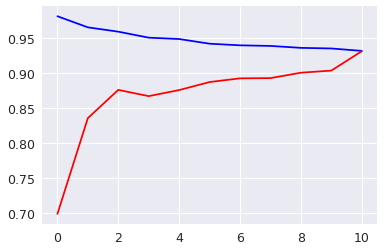

0.00776255034241


In [970]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import LinearRegression
regr = LinearRegression()
it = [200, 300, 400,500, 600, 700, 800, 900, 1000, 1022,1455]
J1,J2 = [],[]
for iteration in it:
    regr = LinearRegression()
    regr.fit(train2.values[:iteration,:], SP.values[:iteration])
    print(iteration)
    score1 = regr.score(train2.values[:iteration,:], SP.values[:iteration])
    score2 = regr.score(x_test, y_test)
    J1.append(score1)
    J2.append(score2)
    print(1 - score1,1-score2)
    
plt.plot(J1,'b-',label="J_train")
plt.plot(J2,'r-',label="J_test")
# plt.label()
plt.show()
y_pred1 = regr.predict(x_test)
error = rmsle(y_pred1, y_test)
print(error)
y_pred_regr = regr.predict(test2.values)
y_pred_regr[y_pred_regr<0] = 0
y_pred_regr = np.exp(y_pred_regr)
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_regr
sub1.to_csv("prediction_LRegr.csv",index=False)

In [918]:
# (lr.coef_[lr.coef_<0]).shape

#### 2. Lasso

100
200
0.0224191025312 0.214587832701
300
0.0380940150495 0.144006408211
400
0.0452915670076 0.116974377991
500
0.0519824424986 0.127704250825
600
0.0538731648441 0.123955618697
700
0.0602373980158 0.114640397314
800
0.0631423534284 0.110318356284
900
0.0642204153251 0.110134232859
950
0.064570373851 0.106514830099
1000
0.06704400595 0.103840260844
1022
0.0678715849263 0.100437956578
1455
0.0721830025141 0.0726756268998


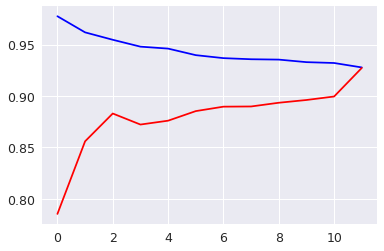

0.00799516910836


In [959]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import Lasso
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022,1455]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        lr = Lasso(0.000092, max_iter= 1000000)
        lr.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = lr.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = lr.score(x_test, y_test)
#         y_pred1 = lr.predict(train2.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = lr.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1 - score1, 1 - score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = lr.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred_lasso = lr.predict(test2.values)
# print(lr.coef_)
# print(all_data.head())
y_pred_lasso[y_pred_lasso<0] = 0
y_pred_lasso = np.exp(y_pred_lasso)
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_lasso
# sub1.to_csv("prediction_lasso.csv",index=False)

In [920]:

(lr.coef_[lr.coef_ < 0.01]).shape

(108,)

#### 3. Ridge Regression

100
200
0.0191147758395 0.282016431621
300
0.0349446096743 0.163233524646
400
0.0412639550259 0.120745377045
500
0.0494244525038 0.132641823077
600
0.051359256517 0.124942912969
700
0.0581506351919 0.112981771138
800
0.0603069790614 0.107817857965
900
0.0611899970157 0.106510404771
950
0.0614726055815 0.102042165654
1000
0.0636598302107 0.099306781555
1022
0.0643265487811 0.0958955086024
1455
0.0681287785985 0.0684173316689


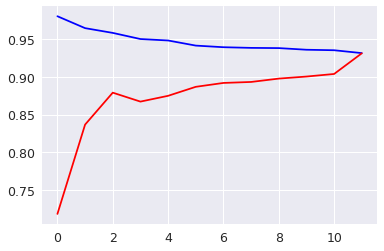

0.00776003465965
(1459,) (1459,)


In [956]:
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

from sklearn.linear_model import Ridge
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022, 1455]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        rdg = Ridge(0.01, max_iter= 10000)
        rdg.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = rdg.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = rdg.score(x_test, y_test)
#         y_pred1 = rdg.predict(train2.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = rdg.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1- score1, 1- score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = rdg.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred_ridge = rdg.predict(test2.values)
y_pred_ridge[y_pred_ridge<0] = 0
y_pred_ridge = np.exp(y_pred_ridge)
# y_pred = 0.5*y_pred_ridge + 0.5*y_pred_lasso
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred_ridge
sub1.to_csv("prediction_ridge.csv",index=False)
print(y_pred_ridge.shape, y_pred.shape)

In [922]:
(rdg.coef_[rdg.coef_ < 0.01]).shape

(88,)

##### Grid Search 

In [955]:
## from sklearn.model_selection import GridSearchCV
parameters = [{'alpha':[0.1,0.01,0.001,0.000092,0.0001,0.0002,0.0003,2,5,10,20,30,50,100],'max_iter':[100000]}]
grid_search = GridSearchCV(estimator = rdg, param_grid = parameters, scoring = 'r2', cv =10)
grid_search.fit(train2.values, SP.values)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print(best_accuracy)
print(best_parameters)

0.911472618694
{'alpha': 0.01, 'max_iter': 100000}


#### 4. Random Forest

100
200
0.0410062701221 0.158522573676
300
0.0291762196632 0.145462390743
400
0.0241214712523 0.14517740418
500
0.0269033970459 0.145278801405
600
0.0257571248919 0.138328484612
700
0.0254283035315 0.131919396857
800
0.0241670381154 0.135993444312
900
0.0228924483359 0.130008486483
950
0.0231409195875 0.128435156791
1000
0.024169755188 0.12284523681
1022
0.0238302334267 0.120680674748
1455
0.0223839622847 0.0215484831582


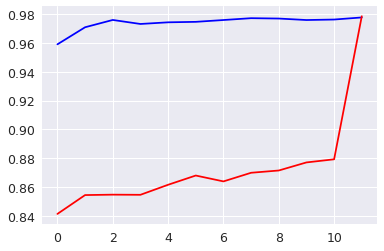

0.0043630838839


In [924]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
def rmsle(predicted, actual):
    assert(len(predicted) == len(actual))
    p = np.log(np.array(predicted) + 1)
    a = np.log(np.array(actual) + 1)
    return (((p - a)**2).sum() / len(predicted))**0.5

rf = RandomForestRegressor()
it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022, 1455]
J1,J2 = [],[]
# alpha =[1,10,100,140,200,1000]
alpha = [100]
for al in alpha:
    print(al)
    J1,J2= [],[]
    for iteration in it:
        rf = RandomForestRegressor(n_estimators = 30, random_state = 0,min_samples_split=4,
                                 )
        rf.fit(train2.values[:iteration,:], SP.values[:iteration])
        print(iteration)
        score1 = rf.score(train2.values[:iteration,:], SP.values[:iteration])
        score2 = rf.score(x_test, y_test)
#         y_pred1 = rf.predict(train1.values[:iteration,:])
#         score1 = rmsle(y_pred1, SP.values[:iteration])
#         y_pred1 = rf.predict(x_test)
#         score2 = rmsle(y_pred1, y_test)
        J1.append(score1)
        J2.append(score2)
        print(1 - score1, 1 - score2)
    
    plt.plot(J1,'b-',label="J_train")
    plt.plot(J2,'r-',label="J_test")
    # plt.label()
    plt.show()
    y_pred1 = rf.predict(x_test)
    error = rmsle(y_pred1, y_test)
    print(error)
y_pred = rf.predict(test2.values)
y_pred[y_pred<0] = 0
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_rf.csv",index=False)

#### 5.SVM

In [925]:
# from sklearn.svm import SVR
# import numpy as np

# it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022, 1455]
# J1,J2 = [],[]
# # alpha =[1,10,100,140,200,1000]
# alpha = [100]
# for al in alpha:
#     print(al)
#     J1,J2= [],[]
#     for iteration in it:
#         sv = SVR(kernel = 'linear',C= 0.004, max_iter = 100000, gamma = .04)
#         sv.fit(train2.values[:iteration,:], SP.values[:iteration])
#         print(iteration)
#         score1 = sv.score(train2.values[:iteration,:], SP.values[:iteration])
#         score2 = sv.score(x_test, y_test)
# #         y_pred1 = rdg.predict(train2.values[:iteration,:])
# #         score1 = rmsle(y_pred1, SP.values[:iteration])
# #         y_pred1 = rdg.predict(x_test)
# #         score2 = rmsle(y_pred1, y_test)
#         J1.append(score1)
#         J2.append(score2)
#         print(1 - score1, 1 - score2)
    
#     plt.plot(J1,'b-',label="J_train")
#     plt.plot(J2,'r-',label="J_test")
#     # plt.label()
#     plt.show()
#     y_pred1 = sv.predict(x_test)
#     error = rmsle(y_pred1, y_test)
#     print(error)
# y_pred_svm = sv.predict(test2.values)
# y_pred_svm[y_pred_svm<0] = 0
# y_pred_svm = np.exp(y_pred_svm)
# # y_pred = 0.5*y_pred_ridge + 0.5*y_pred_lasso
# sub1 = pd.DataFrame()
# sub1['Id']=ID
# sub1['SalePrice']=y_pred_svm
# sub1.to_csv("prediction_svm.csv",index=False)
# print(y_pred_svm.shape, y_pred.shape)

#### 6. XGBoost

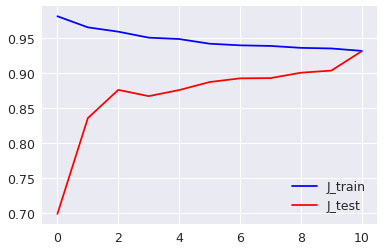

(1459,) (1459,)


In [971]:
from sklearn.model_selection import cross_val_score
from sklearn import ensemble
import xgboost as xgb
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

#   colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.68,
#                  max_depth=5,
#                  min_child_weight=1.5,
#                  n_estimators=7429,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1

##############################################
# it = [200, 300, 400,500, 600, 700, 800, 900, 950,1000, 1022, 1455]
it=[]
for iteration in it: 
    xg = xgb.XGBRegressor(n_estimators = 1000,reg_alpha=0.9,reg_lambda=0.6)
    xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
#                  subsample=0.2,
#     xg = xgb.XGBRegressor(
#                  colsample_bytree=0.2,
#                  gamma=0.0,
#                  learning_rate=0.01,
#                  max_depth=4,
#                  min_child_weight=1.5,
#                  n_estimators=7200,                                                                  
#                  reg_alpha=0.9,
#                  reg_lambda=0.6,
#                  subsample=0.2,
#                  seed=42,
#                  silent=1)
    xg.fit(train2.values[:iteration,:], SP.values[:iteration])
#     y_pred1 = xg.predict(x_test)
    score1 = xg.score(train2.values[:iteration,:], SP.values[:iteration])
    score2 = xg.score(x_test, y_test)

    # print(rmsle(y_pred1, y_test))
#     y_pred2 = xg.predict(train1.values[:i,:])
#     print(xg.score(train1.values[:i,:],SP.values[:i]))
#     print(rmsle(y_pred2, SP.values[:i]))
#     y_pred1 = xg.predict(train1.values[:iteration,:])
#     score1 = rmsle(y_pred1, SP.values[:iteration])
#     y_pred1 = xg.predict(x_test)
#     score2 = rmsle(y_pred1, y_test)
    J1.append(score1)
    J2.append(score2)
    print(1 - score1, 1 - score2)

plt.plot(J1,'b-',label="J_train")
plt.plot(J2,'r-',label="J_test")
plt.legend()
plt.show()


#############################################
#  scoring = 'neg_mean_squared_log_error'
# scoring = 'neg_mean_absolute_error'
# accuracies = cross_val_score(xg, train1.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
# print(accuracies)
# print(accuracies.mean())
# print(accuracies.std())

xg = ensemble.GradientBoostingRegressor(n_estimators=3500, learning_rate=0.01, max_depth=3, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
xg.fit(train2.values, SP.values)
y_pred = xg.predict(test2.values)
y_pred[y_pred<0] = 0
y_pred = np.exp(y_pred)
y_pred = ((y_pred + y_pred_ridge +y_pred_lasso+ y_pred_regr)/4)
sub1 = pd.DataFrame()
sub1['Id']=ID
sub1['SalePrice']=y_pred
sub1.to_csv("prediction_xg.csv",index=False)
print(y_pred_ridge.shape, y_pred.shape)

In [ ]:
pd.DataFrame({'SP':SP.values, 'Pred':xg.predict()})

#####  K-Fold Validation

In [ ]:
# from sklearn.model_selection import KFold
# from sklearn import ensemble
# kf = KFold(n_splits=10)
# kf.get_n_splits(train1) 

# for train_index, test_index in kf.split(train1):
#     print("TRAIN:", train_index,test_index)
#     X_train, X_test = train1.values[train_index], train1.values[test_index]
#     y_train, y_test = SP.values[train_index], SP.values[test_index]
# #     xg = xgb.XGBRegressor(
# #                  n_estimators= 1000,                                                                  
# #                  reg_alpha=0.9,
# #                  reg_lambda=0.6)
#     xg = ensemble.GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=3, max_features='sqrt',
#                                                min_samples_leaf=15, min_samples_split=10, loss='huber')
# #                  subsample=0.2,
# #                  seed=42,

    
#     lr.fit(X_train, y_train)
#     y_pred1 = lr.predict(X_test)
#     regr.fit(X_train, y_train)
#     y_pred1 = y_pred1 + regr.predict(X_test)
#     rdg.fit(X_train, y_train)
#     y_pred1 = y_pred1 + rdg.predict(X_test)
#     xg.fit(X_train, y_train)
#     y_pred1 =  xg.predict(X_test)
#     y_pred1 = y_pred1
#     print(rmsle(y_pred1, y_test))
   
# print(train1.index)
# pd.options.display.max_rows = 200
# temp1 = list(np.arange(580,724))
# temp2 = list(np.arange(0,580))
# temp3 = list(np.arange(724,1444))
# temp2 = temp2 + temp3
# # train1.drop(["MoSold"], axis = 1, inplace = True)
# X_train , X_test = train1.values[temp2], train1.values[temp1]
# y_train, y_test = SP.values[temp2], SP.values[temp1]

# lr.fit(X_train, y_train)
# y_pred1 = lr.predict(X_test)
# regr.fit(X_train, y_train)
# y_pred1 = y_pred1 + regr.predict(X_test)
# rdg.fit(X_train, y_train)
# y_pred1 = y_pred1 + rdg.predict(X_test)
# # rf.fit(X_train, y_train)
# # y_pred1 = y_pred1 + rf.predict(X_test)
# y_pred1 = y_pred1/3
# print(rmsle(y_pred1, y_test))
# temp = train1.iloc[temp1].copy()
# temp['Prediction'] = y_pred1
# temp['Real'] = SP.iloc[temp1]
# temp


In [ ]:
np.arange(1,2)

In [ ]:
# train_temp = train1[580:724,:]
# test_temp = 

##### K-Fold Validation

In [961]:
accuracies = cross_val_score(regr, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1- accuracies)
print(1- accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(lr, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(rdg, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(rf, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

accuracies = cross_val_score(xg, train2.values,  SP.values, cv = 10, scoring = 'r2')
# accuracies = -accuracies
# accuracies = (accuracies)**0.5
print(1 - accuracies)
print(1 - accuracies.mean())
print(accuracies.std(),"\n-----------------\n")

[ 0.10530615  0.06694719  0.07246546  0.08620028  0.11005919  0.09380543
  0.08736107  0.08082211  0.08979453  0.09636833]
0.0889129747005
0.0127453505704 
-----------------

[ 0.10098353  0.06174236  0.08066497  0.08630279  0.10580899  0.09664572
  0.09347246  0.0856083   0.0873253   0.10080533]
0.0899359744122
0.0121212497075 
-----------------

[ 0.10358305  0.0651582   0.07342742  0.08631909  0.11041188  0.09350099
  0.08829007  0.0817253   0.08657673  0.09630687]
0.0885299587346
0.0127279051878 
-----------------

[ 0.14611288  0.10633089  0.09751331  0.11391635  0.14619169  0.10033955
  0.12635071  0.09753285  0.10997437  0.15339863]
0.119766123133
0.0206021014366 
-----------------

[ 0.08992932  0.05790072  0.05508109  0.09753771  0.09657272  0.07956924
  0.0871227   0.072288    0.0646343   0.09051179]
0.0791147589267
0.0149643173368 
-----------------

